# 单模型分类器

In [1]:
import h5py
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import *
from keras.callbacks import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model
import matplotlib.pyplot as plt
import os

np.random.seed(2018)


D:\ProgramData\Anaconda3\envs\tf36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plot_history(history):
    # list all data in history
    # print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## 读取特征数据

* 使用80%数据作为训练集，20%数据作为验证集

In [3]:
def read_feature(model_name: str):
    h5_file = "feature_%s.h5"%model_name

    with h5py.File(h5_file, 'r') as h:
        X_pretrain = np.array(h['pretrain'])
        y_pretrain = np.array(h['pretrain_label'])
        X_finetune = np.array(h['finetune'])
        y_finetune = np.array(h['finetune_label'])
        X_val = np.array(h['val'])
        y_val = np.array(h['val_label'])
        X_test = np.array(h['test'])

    X_train = np.concatenate((X_pretrain, X_finetune), axis=0)
    y_train = np.concatenate((y_pretrain, y_finetune), axis=0)

    X_train, y_train = shuffle(X_train, y_train)
    
    return X_train, y_train, X_val, y_val, X_test


## 构建分类器

In [35]:
def build_model(input_shape, drop_prob: float, lr=1e-2, decay=0):
    input_tensor = Input(input_shape)
    x = Dropout(drop_prob)(input_tensor)
    x = Dense(1, activation='sigmoid', name='top_sigmoid')(x)
    model = Model(input_tensor, x)

    opt = optimizers.Adam(lr=lr, decay=decay)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

### InceptionV3

In [55]:
model_name = 'InceptionV3'
X_train, y_train, X_val, y_val, X_test = read_feature(model_name)
print(X_train.shape, X_val.shape)

(19916, 2048) (4979, 2048)


* 调整参数

In [56]:
model = build_model(X_train.shape[1:], 0.5, lr=1e-3, decay=1e-6)

In [57]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
             ModelCheckpoint(filepath='top_model_%s.h5'%model_name, monitor='val_loss', verbose=0, save_best_only=True)]

history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val), callbacks=callbacks)

Train on 19916 samples, validate on 4979 samples
Epoch 1/30
19916/19916 [==============================] - 1s 67us/step - loss: 0.1151 - acc: 0.9680 - val_loss: 0.0321 - val_acc: 0.9920
Epoch 2/30
19916/19916 [==============================] - 1s 47us/step - loss: 0.0334 - acc: 0.9929 - val_loss: 0.0238 - val_acc: 0.9920
Epoch 3/30
19916/19916 [==============================] - 1s 44us/step - loss: 0.0247 - acc: 0.9937 - val_loss: 0.0180 - val_acc: 0.9950
Epoch 4/30
19916/19916 [==============================] - 1s 46us/step - loss: 0.0218 - acc: 0.9943 - val_loss: 0.0178 - val_acc: 0.9934
Epoch 5/30
19916/19916 [==============================] - 1s 41us/step - loss: 0.0194 - acc: 0.9946 - val_loss: 0.0156 - val_acc: 0.9956
Epoch 6/30
19916/19916 [==============================] - 1s 42us/step - loss: 0.0183 - acc: 0.9946 - val_loss: 0.0172 - val_acc: 0.9954
Epoch 7/30
19916/19916 [==============================] - 1s 45us/step - loss: 0.0177 - acc: 0.9951 - val_loss: 0.0154 - val_acc:

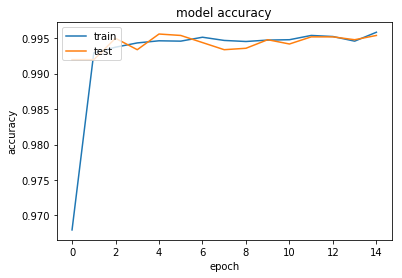

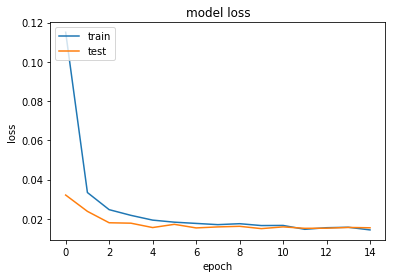

In [58]:
plot_history(history)

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Xception

In [11]:
model_name = 'Xception'
X_train, y_train, X_val, y_val, X_test = read_feature(model_name)
print(X_train.shape, X_val.shape)

(19916, 2048) (4979, 2048)


* 调整参数

In [48]:
model = build_model(X_train.shape[1:], 0.6, lr=1e-3, decay=1e-6)

In [49]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
             ModelCheckpoint(filepath='top_model_%s.h5'%model_name, monitor='val_loss', verbose=0, save_best_only=True)]

history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val), callbacks=callbacks)

Train on 19916 samples, validate on 4979 samples
Epoch 1/30
19916/19916 [==============================] - 1s 61us/step - loss: 0.1466 - acc: 0.9704 - val_loss: 0.0414 - val_acc: 0.9940
Epoch 2/30
19916/19916 [==============================] - 1s 46us/step - loss: 0.0389 - acc: 0.9928 - val_loss: 0.0255 - val_acc: 0.9944
Epoch 3/30
19916/19916 [==============================] - 1s 45us/step - loss: 0.0282 - acc: 0.9939 - val_loss: 0.0201 - val_acc: 0.9950
Epoch 4/30
19916/19916 [==============================] - 1s 45us/step - loss: 0.0242 - acc: 0.9943 - val_loss: 0.0174 - val_acc: 0.9948
Epoch 5/30
19916/19916 [==============================] - 1s 45us/step - loss: 0.0214 - acc: 0.9941 - val_loss: 0.0160 - val_acc: 0.9950
Epoch 6/30
19916/19916 [==============================] - 1s 45us/step - loss: 0.0197 - acc: 0.9949 - val_loss: 0.0152 - val_acc: 0.9950
Epoch 7/30
19916/19916 [==============================] - 1s 46us/step - loss: 0.0185 - acc: 0.9947 - val_loss: 0.0146 - val_acc:

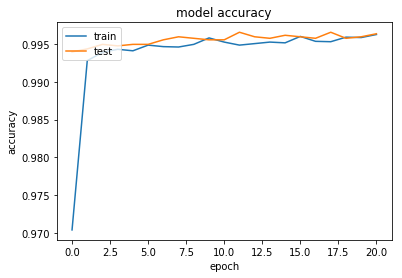

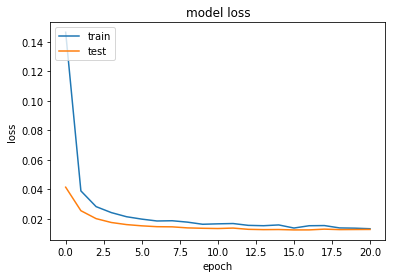

In [50]:
plot_history(history)

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### InceptionResNetV2

In [63]:
model_name = 'InceptionResNetV2'
X_train, y_train, X_val, y_val, X_test = read_feature(model_name)
print(X_train.shape, X_val.shape)

(19916, 1536) (4979, 1536)


* 调整参数

In [66]:
model = build_model(X_train.shape[1:], 0.4, lr=1e-3, decay=1e-6)

In [67]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
             ModelCheckpoint(filepath='top_model_%s.h5'%model_name, monitor='val_loss', verbose=0, save_best_only=True)]

history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val), callbacks=callbacks)

Train on 19916 samples, validate on 4979 samples
Epoch 1/30
19916/19916 [==============================] - 1s 60us/step - loss: 0.1261 - acc: 0.9689 - val_loss: 0.0333 - val_acc: 0.9950
Epoch 2/30
19916/19916 [==============================] - 1s 38us/step - loss: 0.0332 - acc: 0.9936 - val_loss: 0.0210 - val_acc: 0.9954
Epoch 3/30
19916/19916 [==============================] - 1s 38us/step - loss: 0.0244 - acc: 0.9946 - val_loss: 0.0169 - val_acc: 0.9960
Epoch 4/30
19916/19916 [==============================] - 1s 37us/step - loss: 0.0215 - acc: 0.9950 - val_loss: 0.0147 - val_acc: 0.9968
Epoch 5/30
19916/19916 [==============================] - 1s 37us/step - loss: 0.0189 - acc: 0.9954 - val_loss: 0.0136 - val_acc: 0.9966
Epoch 6/30
19916/19916 [==============================] - 1s 38us/step - loss: 0.0184 - acc: 0.9957 - val_loss: 0.0133 - val_acc: 0.9964
Epoch 7/30
19916/19916 [==============================] - 1s 37us/step - loss: 0.0167 - acc: 0.9958 - val_loss: 0.0126 - val_acc:

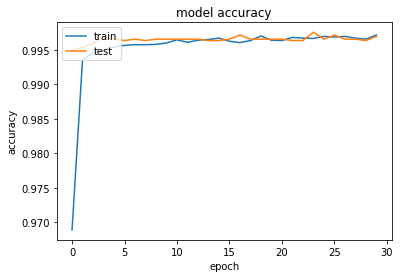

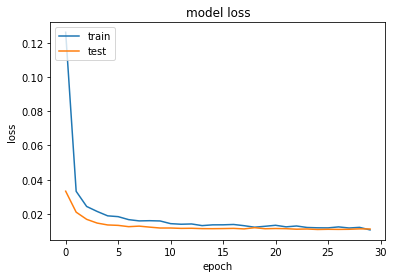

In [68]:
plot_history(history)

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## 预测测试集

In [69]:
model.load_weights('top_model_%s.h5'%model_name)

In [70]:
y_pred = model.predict(X_test, verbose=1)

12500/12500 [==============================] - 0s 31us/step


In [71]:
y_pred_clip = y_pred.clip(min=0.005, max=0.995)

In [72]:
df = pd.read_csv("sampleSubmission.csv")

image_size = (299, 299)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("test", image_size, shuffle=False, 
                                         batch_size=64, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind(os.sep)+1:fname.rfind('.')])
    df.loc[index-1, ['label']] = y_pred_clip[i]

df.to_csv('pred.csv', index=None)
df.head(10)

Found 12500 images belonging to 1 classes.


,id,label
0,1,0.995
1,2,0.995
2,3,0.995
3,4,0.995
4,5,0.005
5,6,0.005
6,7,0.005
7,8,0.005
8,9,0.005
9,10,0.005
